In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('ufo.csv', encoding='latin1')

df.head()

,datetime,duration_in_secs,country,city,shape,coordinates,coordinates_area_51,coordinates_palo_verde_nuclear_generating_station,distance_in _km_from_palo_verde_ngs,distance_in _km_from_a51
0,2014-05-01 21:00:00,2700.0,us,los angeles,light,"(34.0522222, -118.2427778)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",502,416
1,2014-04-30 21:10:00,60.0,us,las vegas,light,"(36.175, -115.1363889)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",372,132
2,2014-04-24 20:00:00,240.0,us,phoenix,circle,"(33.4483333, -112.07333329999999)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",73,540
3,2014-04-23 20:30:00,300.0,us,phoenix,circle,"(33.4483333, -112.07333329999999)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",73,540
4,2014-04-20 22:50:00,5.0,us,seattle,formation,"(47.6063889, -122.33083329999998)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",1768,1270


In [3]:
df.shape

(2070, 10)

In [4]:
df['duration_in_secs']=df['duration_in_secs'].astype(int)

In [5]:
df.dropna(subset=['datetime'])

,datetime,duration_in_secs,country,city,shape,coordinates,coordinates_area_51,coordinates_palo_verde_nuclear_generating_station,distance_in _km_from_palo_verde_ngs,distance_in _km_from_a51
0,2014-05-01 21:00:00,2700,us,los angeles,light,"(34.0522222, -118.2427778)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",502,416
1,2014-04-30 21:10:00,60,us,las vegas,light,"(36.175, -115.1363889)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",372,132
2,2014-04-24 20:00:00,240,us,phoenix,circle,"(33.4483333, -112.07333329999999)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",73,540
3,2014-04-23 20:30:00,300,us,phoenix,circle,"(33.4483333, -112.07333329999999)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",73,540
4,2014-04-20 22:50:00,5,us,seattle,formation,"(47.6063889, -122.33083329999998)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",1768,1270
...,...,...,...,...,...,...,...,...,...,...
2052,1954-07-01 22:00:00,15,us,los angeles,circle,"(34.0522222, -118.2427778)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",502,416
2053,1953-04-15 12:00:00,5,us,los angeles,fireball,"(34.0522222, -118.2427778)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",502,416
2054,1951-02-15 11:00:00,2700,us,los angeles,disk,"(34.0522222, -118.2427778)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",502,416
2055,1949-04-10 15:00:00,600,us,seattle,disk,"(47.6063889, -122.33083329999998)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",1768,1270


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   datetime                                           2057 non-null   object
 1   duration_in_secs                                   2070 non-null   int64 
 2   country                                            2070 non-null   object
 3   city                                               2070 non-null   object
 4   shape                                              2070 non-null   object
 5   coordinates                                        2070 non-null   object
 6   coordinates_area_51                                2070 non-null   object
 7   coordinates_palo_verde_nuclear_generating_station  2070 non-null   object
 8   distance_in _km_from_palo_verde_ngs                2070 non-null   int64 
 9   distance_in _km_fro

### EDA dataset

In [7]:
df.corr(method='pearson')

,duration_in_secs,distance_in _km_from_palo_verde_ngs,distance_in _km_from_a51
duration_in_secs,1.000000,-0.033502,-0.018791
distance_in _km_from_palo_verde_ngs,-0.033502,1.000000,0.899386
distance_in _km_from_a51,-0.018791,0.899386,1.000000


In [8]:
df.describe()

,duration_in_secs,distance_in _km_from_palo_verde_ngs,distance_in _km_from_a51
count,2.070000e+03,2070.000000,2070.000000
mean,1.568906e+03,943.757971,783.645411
std,2.775172e+04,797.331978,592.357774
min,0.000000e+00,73.000000,132.000000
25%,3.000000e+01,372.000000,416.000000
50%,1.800000e+02,502.000000,540.000000
75%,6.000000e+02,1768.000000,1270.000000
max,1.209600e+06,3831.000000,3870.000000


In [9]:
import pylab as plt

In [10]:
import seaborn as sns

In [11]:
plt.rcParams['figure.figsize']=(15,8)

<AxesSubplot:xlabel='distance_in _km_from_a51', ylabel='count'>

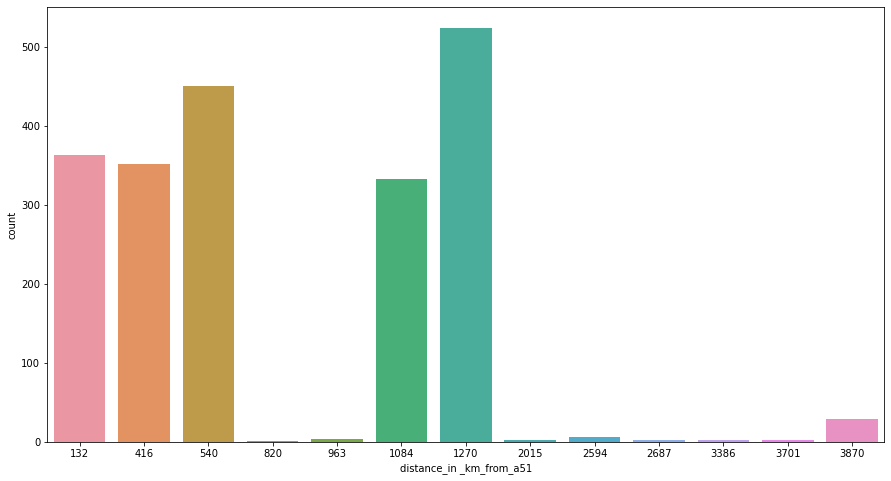

In [12]:
sns.countplot(x=df['distance_in _km_from_a51'])

Podemos observar que hay un gran número de casos que tienen lugar entre 100-500 km 

<AxesSubplot:xlabel='distance_in _km_from_palo_verde_ngs', ylabel='count'>

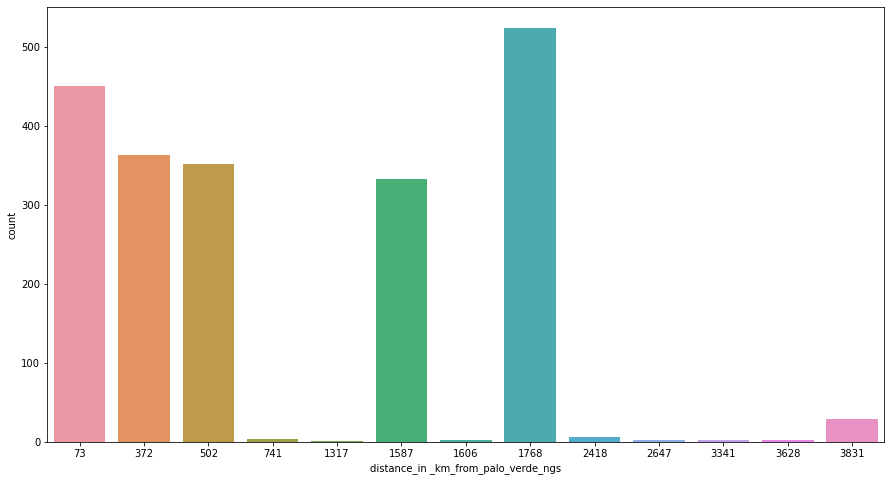

In [13]:
sns.countplot(x=df['distance_in _km_from_palo_verde_ngs'])

Podemos observar, que la mayoría de avistamientos está relativamente cerca de ambas coordenadas

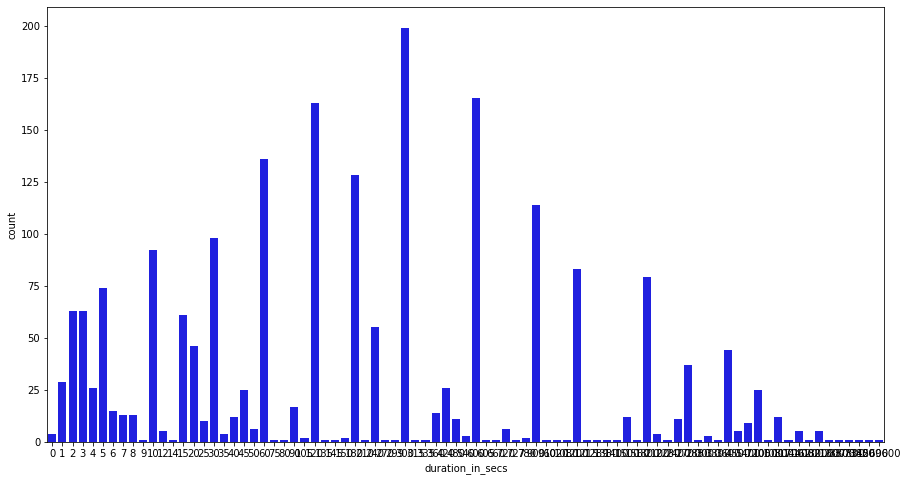

In [14]:
sns.countplot(x=df.duration_in_secs, color='b');

<AxesSubplot:>

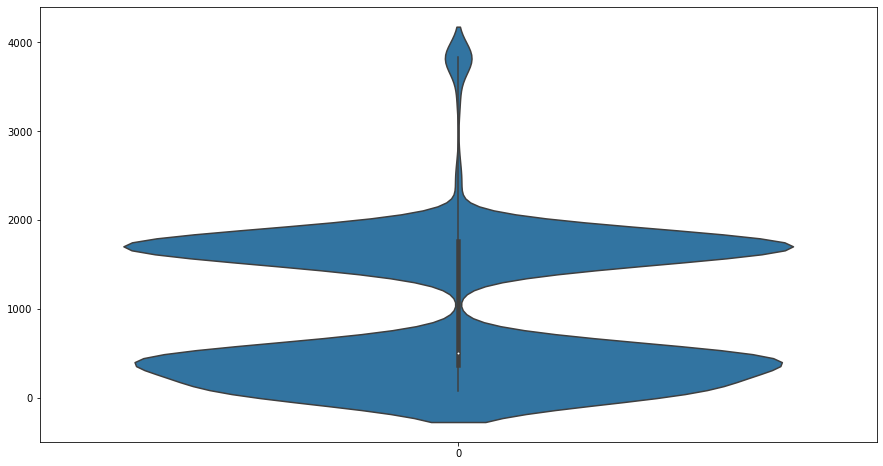

In [15]:
sns.violinplot(data=df['distance_in _km_from_palo_verde_ngs'])

<AxesSubplot:>

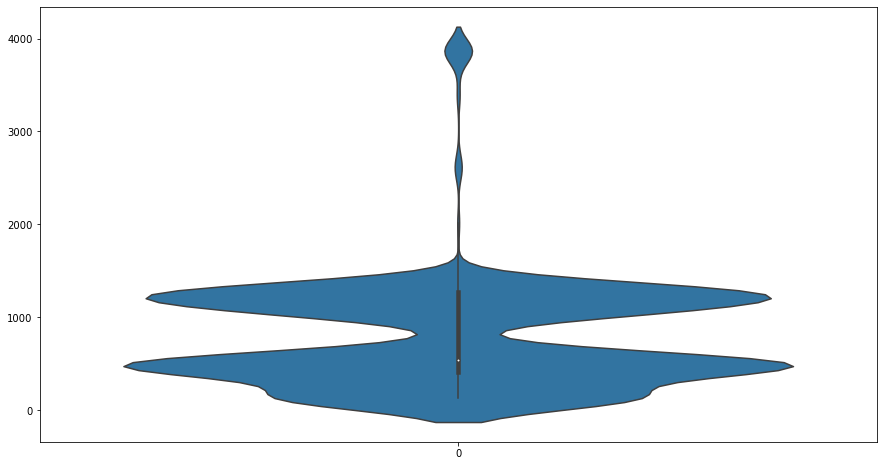

In [16]:
sns.violinplot(data=df['distance_in _km_from_a51'])

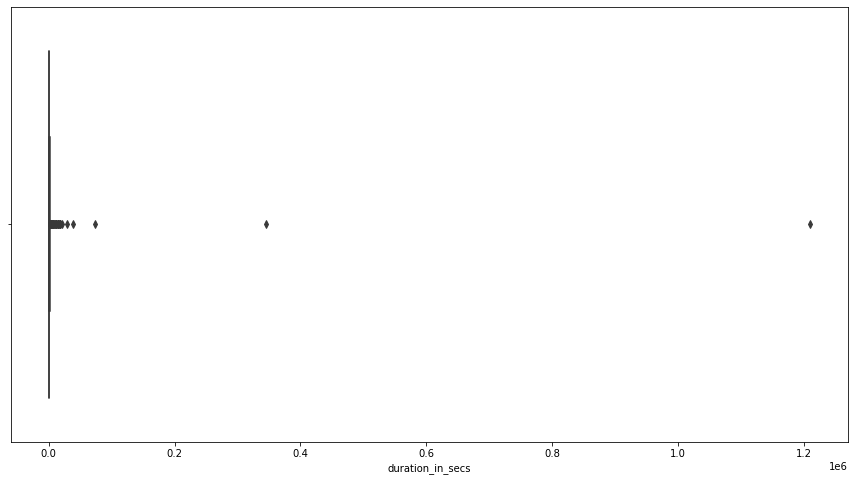

In [17]:
sns.boxplot(x=df.duration_in_secs, color='y');

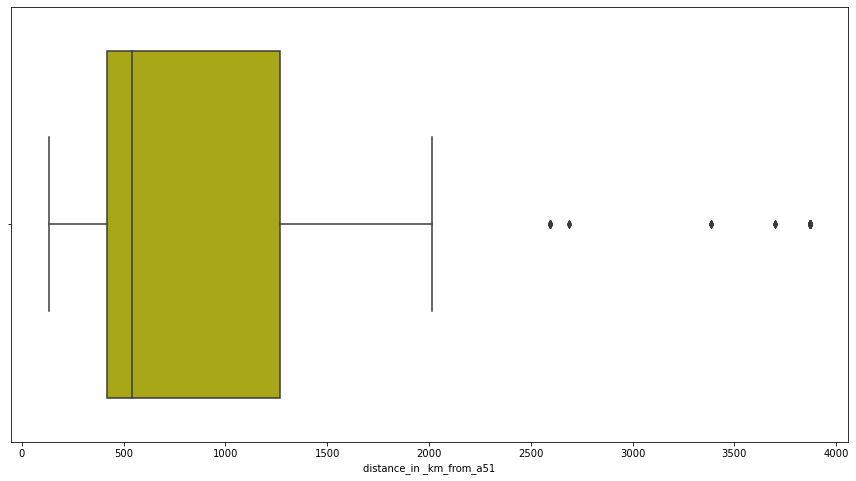

In [18]:
sns.boxplot(x=df['distance_in _km_from_a51'], color='y');

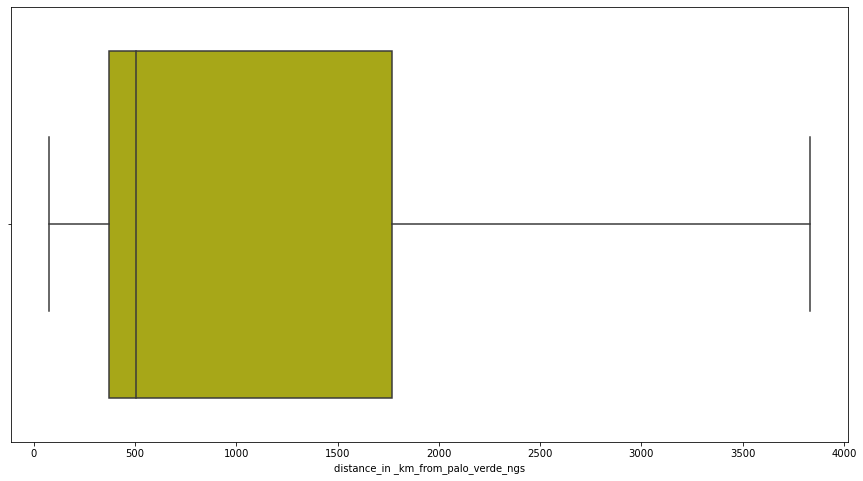

In [19]:
sns.boxplot(x=df['distance_in _km_from_palo_verde_ngs'], color='y');

In [20]:
stats=df.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats['IQR1.5']=1.5*stats['IQR']+stats['75%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR,IQR1.5
duration_in_secs,2070.0,1568.906280,27751.720522,0.0,30.0,180.0,600.0,1209600.0,570.0,1455.0
distance_in _km_from_palo_verde_ngs,2070.0,943.757971,797.331978,73.0,372.0,502.0,1768.0,3831.0,1396.0,3862.0
distance_in _km_from_a51,2070.0,783.645411,592.357774,132.0,416.0,540.0,1270.0,3870.0,854.0,2551.0


<AxesSubplot:>

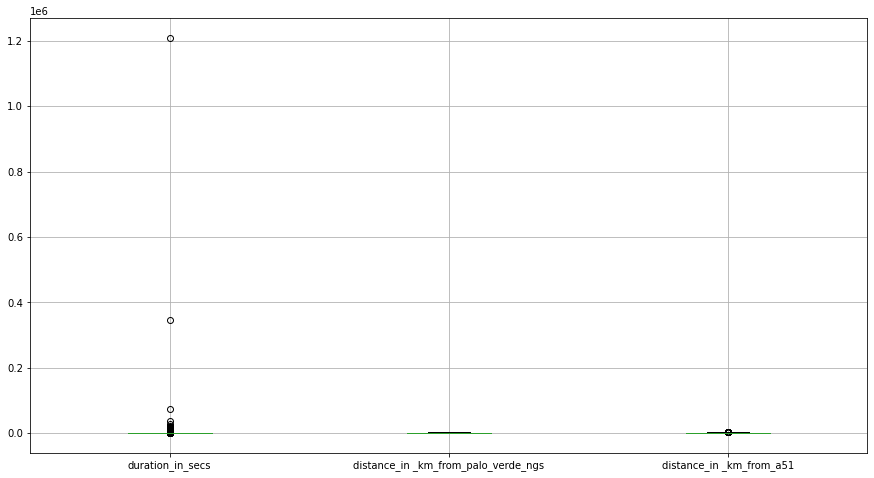

In [21]:
df.boxplot()

In [22]:
df.columns

Index(['datetime', 'duration_in_secs', 'country', 'city', 'shape',
       'coordinates', 'coordinates_area_51',
       'coordinates_palo_verde_nuclear_generating_station',
       'distance_in _km_from_palo_verde_ngs', 'distance_in _km_from_a51'],
      dtype='object')

In [23]:
df['distance_in_km_from_palo_verde_ngs']= df['distance_in _km_from_palo_verde_ngs']

In [24]:
df['distance_in_km_from_a51']= df['distance_in _km_from_a51']

In [25]:
df=df.drop('distance_in _km_from_palo_verde_ngs',axis=1)

In [26]:
df=df.drop('distance_in _km_from_a51',axis=1)

In [27]:
df.head()

,datetime,duration_in_secs,country,city,shape,coordinates,coordinates_area_51,coordinates_palo_verde_nuclear_generating_station,distance_in_km_from_palo_verde_ngs,distance_in_km_from_a51
0,2014-05-01 21:00:00,2700,us,los angeles,light,"(34.0522222, -118.2427778)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",502,416
1,2014-04-30 21:10:00,60,us,las vegas,light,"(36.175, -115.1363889)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",372,132
2,2014-04-24 20:00:00,240,us,phoenix,circle,"(33.4483333, -112.07333329999999)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",73,540
3,2014-04-23 20:30:00,300,us,phoenix,circle,"(33.4483333, -112.07333329999999)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",73,540
4,2014-04-20 22:50:00,5,us,seattle,formation,"(47.6063889, -122.33083329999998)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",1768,1270


In [66]:
nan_cols = df.isna().sum()

In [67]:
nan_cols[nan_cols>0]

Series([], dtype: int64)

In [68]:
df.datetime= df.datetime.fillna(0)

In [69]:
nan_cols

datetime                                             0
duration_in_secs                                     0
country                                              0
city                                                 0
shape                                                0
coordinates                                          0
coordinates_area_51                                  0
coordinates_palo_verde_nuclear_generating_station    0
distance_in_km_from_palo_verde_ngs                   0
distance_in_km_from_a51                              0
dtype: int64

In [28]:
import mysql.connector as conn

In [29]:
crea_db=conn.connect(host='localhost', user='root', passwd='xx')

In [30]:
cursor=crea_db.cursor()

In [31]:
def crear_db(nombre, user='root', password='xx', check=True):
    
    crea_db=conn.connect(host='localhost', user=user, passwd=password)

    cursor=crea_db.cursor()

    cursor.execute(f'drop database if exists {nombre}')
    cursor.execute(f'create database {nombre}')
    
    print('Hecho, base de datos creada. ;)')
    
    if check:
        cursor.execute('show databases')
        for x in cursor:
            print(x)

In [32]:
def crear_tabla_desde_df(df, nombre_tabla, nombre_db, user='root', password='xx', check=True, drop=False):
    
    db=conn.connect(host='localhost', user=user, passwd=password, database=nombre_db)
    cursor=db.cursor()
    
    if drop:
        cursor.execute(f'drop table if exists {nombre_tabla}')
    
    tabla=f"create table {nombre_tabla}(id int, {' varchar(200),'.join(df.columns)} varchar(200));"
    print(tabla)
    
    cursor.execute(tabla)
    
    print(f'Hecho, tabla {nombre_tabla} creada. ;)')
    
    if check:
        cursor.execute('show tables')
        for x in cursor:
            print(x)

In [33]:
def insertar_datos(df, nombre_tabla, nombre_db, user='root', password='xx', check=True):
    
    db=conn.connect(host='localhost', user=user, passwd=password, database=nombre_db)
    cursor=db.cursor()
    
    for i in range(len(df)):
    
        insert_query='insert into {} (id, {}) values {};'\
                     .format(nombre_tabla, ','.join(df.columns), tuple(np.insert(df.iloc[i].values, 0, i)))

        cursor.execute(insert_query)

    db.commit()
    
    print(f'Hecho, datos dentro de tabla {nombre_tabla}. ;)')
    print()
    print(insert_query)

In [34]:
def leer_sql(query, nombre_tabla, nombre_db, user='root', password='xx'):
    
    db=conn.connect(host='localhost', user=user, passwd=password, database=nombre_db)
    
    data=pd.read_sql(query, db)
    
    return data

In [35]:
crear_db('ufos')

Hecho, base de datos creada. ;)
('information_schema',)
('mydb',)
('mysql',)
('performance_schema',)
('proyectosharks',)
('publication',)
('sakila',)
('sharks',)
('sys',)
('ufos',)
('world',)


In [36]:
db=conn.connect(host='localhost', user='root', passwd='xx', database='ufos')

cursor=db.cursor()

In [37]:
df.columns

Index(['datetime', 'duration_in_secs', 'country', 'city', 'shape',
       'coordinates', 'coordinates_area_51',
       'coordinates_palo_verde_nuclear_generating_station',
       'distance_in_km_from_palo_verde_ngs', 'distance_in_km_from_a51'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   datetime                                           2057 non-null   object
 1   duration_in_secs                                   2070 non-null   int64 
 2   country                                            2070 non-null   object
 3   city                                               2070 non-null   object
 4   shape                                              2070 non-null   object
 5   coordinates                                        2070 non-null   object
 6   coordinates_area_51                                2070 non-null   object
 7   coordinates_palo_verde_nuclear_generating_station  2070 non-null   object
 8   distance_in_km_from_palo_verde_ngs                 2070 non-null   int64 
 9   distance_in_km_from

In [39]:
cursor.execute('drop table if exists ufo_sighting')   # borra la tabla si existe



tabla='''
        create table ufo_sighting(
            
            id int,
            datetime varchar(1000),
            duration_in_secs int,
            country varchar(500),
            city varchar(500),
            shape varchar(500),
            coordinates varchar(500),
            coordinates_area_51 varchar(500),
            coordinates_palo_verde_nuclear_generating_station varchar(500),
            distance_in_km_from_palo_verde_ngs int,
            distance_in_km_from_a51 int
            
             

        );
'''


cursor.execute(tabla)

In [40]:
cursor.execute('show tables')
for x in cursor:
    print(x)

('ufo_sighting',)


In [70]:
for i in range(len(df)):
    
    
    insert_query='insert into {} ({}) values {};'\
                    .format('ufo_sighting', ','.join(df.columns), tuple(df.iloc[i].values))
    
    cursor.execute(insert_query)
    
db.commit()

In [71]:
leer_sql('select * from ufo_sighting limit 3', 'kepler', 'ufos')

,id,datetime,duration_in_secs,country,city,shape,coordinates,coordinates_area_51,coordinates_palo_verde_nuclear_generating_station,distance_in_km_from_palo_verde_ngs,distance_in_km_from_a51
0,None,2014-05-01 21:00:00,2700,us,los angeles,light,"(34.0522222, -118.2427778)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",502,416
1,None,2014-04-30 21:10:00,60,us,las vegas,light,"(36.175, -115.1363889)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",372,132
2,None,2014-04-24 20:00:00,240,us,phoenix,circle,"(33.4483333, -112.07333329999999)","(37.234332396, -115.80666344)","(33.3916667, -112.8638889)",73,540
